In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# @title Download the data

import os, requests, tarfile

fnames = ["kay_labels.npy", "kay_labels_val.npy", "kay_images.npz"]
urls = ["https://osf.io/r638s/download",
        "https://osf.io/yqb3e/download",
        "https://osf.io/ymnjv/download"]

for fname, url in zip(fnames, urls):
  if not os.path.isfile(fname):
    try:
      r = requests.get(url)
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        print(f"Downloading {fname}...")
        with open(fname, "wb") as fid:
          fid.write(r.content)
        print(f"Download {fname} completed!")

In [3]:
with np.load(fname) as dobj:
  dat = dict(**dobj)
labels = np.load('kay_labels.npy')
val_labels = np.load('kay_labels_val.npy')

In [37]:
dat['responses']

array([[ 0.53109303, -0.1711666 , -2.18185285, ..., -0.08087291,
        -0.07181383, -1.14688391],
       [-0.37951583, -1.57913894, -1.52400553, ..., -0.11304473,
        -1.71730024,  1.17662354],
       [ 0.99324019,  1.1198156 ,  1.24312508, ..., -0.11032425,
        -1.38603068, -0.24259401],
       ...,
       [ 0.07942947, -0.8660068 , -1.40801776, ..., -0.97090844,
        -0.42258693,  1.59369111],
       [ 0.18489915, -0.06251201,  0.00356126, ...,  1.31298164,
         0.76796059,  0.30288753],
       [ 0.23190455, -0.59618648,  1.12224124, ...,  1.84459492,
        -1.26185295, -0.28723873]])

In [14]:
dat['stimuli'][:,128//2,:]

array([[-0.01096451, -0.03996596, -0.06854174, ..., -0.05069327,
        -0.02923864, -0.00730968],
       [-0.03996596, -0.11458284, -0.18834832, ..., -0.19245926,
        -0.11811602, -0.03639019],
       [-0.01827413, -0.06142059, -0.12164924, ..., -0.07563245,
        -0.06854174, -0.01461929],
       ...,
       [-0.01461929, -0.08626854, -0.17601559, ...,  0.10552174,
         0.08470565,  0.01812822],
       [-0.02192897, -0.06499636, -0.10045001, ..., -0.06142059,
        -0.07208708, -0.02923864],
       [ 0.00365484, -0.03639019, -0.11811602, ...,  0.11180979,
         0.0757845 ,  0.0289467 ]], dtype=float32)

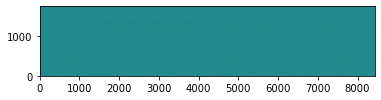

In [45]:
plt.imshow(dat['responses'],origin='lower')

In [43]:
dat['roi']

array([3, 3, 3, ..., 3, 3, 6])

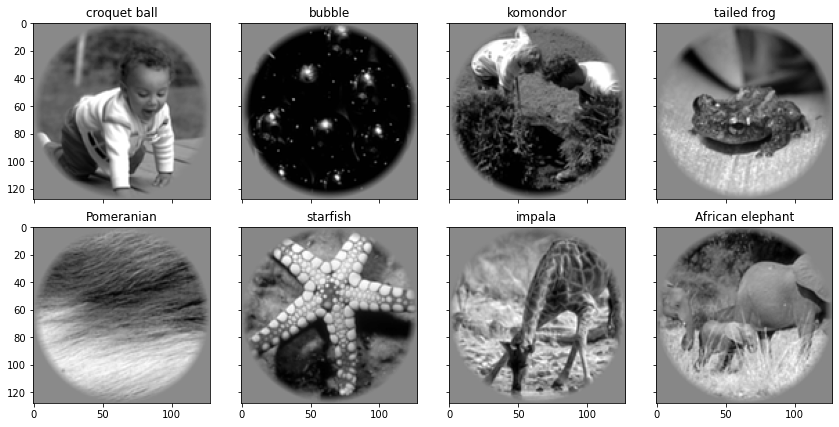

In [4]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6), sharex=True, sharey=True)
for ax, im, lbl in zip(axs.flat, dat["stimuli"], labels[-1, :]):
  ax.imshow(im, cmap="gray")
  ax.set_title(lbl)
fig.tight_layout()
fig.show()

In [12]:
labels

array([['artifact', 'entity', 'animal', ..., 'artifact', 'artifact',
        'artifact'],
       ['instrumentality', 'round shape', 'vertebrate', ..., 'structure',
        'structure', 'instrumentality'],
       ['equipment', 'sphere', 'mammal', ..., 'building', 'landing',
        'conveyance'],
       ['croquet ball', 'bubble', 'komondor', ..., 'monastery', 'dock',
        'warplane']], dtype='<U71')

In [13]:
val_labels

array([['artifact', 'artifact', 'animal', 'animal', 'artifact', 'animal',
        'animal', 'artifact', 'animal', 'animal', 'artifact',
        'geological formation', 'geological formation', 'artifact',
        'geological formation', 'animal', 'animal', 'artifact',
        'artifact', 'artifact', 'artifact', 'artifact', 'animal',
        'artifact', 'artifact', 'artifact', 'artifact', 'animal',
        'artifact', 'animal', 'animal', 'artifact', 'animal', 'artifact',
        'artifact', 'animal', 'animal', 'animal', 'artifact', 'animal',
        'artifact', 'animal', 'artifact', 'animal', 'artifact',
        'geological formation', 'artifact', 'artifact', 'animal',
        'animal', 'geological formation', 'animal', 'artifact',
        'artifact', 'animal', 'geological formation', 'artifact',
        'artifact', 'fruit', 'animal', 'entity', 'artifact', 'entity',
        'geological formation', 'geological formation', 'entity',
        'animal', 'animal', 'entity', 'artifact', 'geolog

In [74]:
# Access the average voxel values in 'roi'
print(dat['responses'].shape)
print(dat['roi'].shape)
#len(dat['responses'])


(1750, 8428)
(8428,)


In [89]:
dat['responses'][0]

array([ 0.53109303, -0.1711666 , -2.18185285, ..., -0.08087291,
       -0.07181383, -1.14688391])

ConversionError: Failed to convert value(s) to axis units: array(['Other', 'V1', 'V2', 'V3', 'V3A', 'V3B', 'V4', 'LatOcc'],
      dtype='<U6')

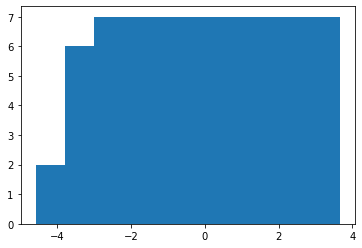

In [90]:
plt.bar(dat['responses'][0], dat['roi'])
plt.yticks(dat['roi_names'])

In [31]:
print(dat.keys())

dict_keys(['stimuli', 'stimuli_test', 'responses', 'responses_test', 'roi', 'roi_names'])


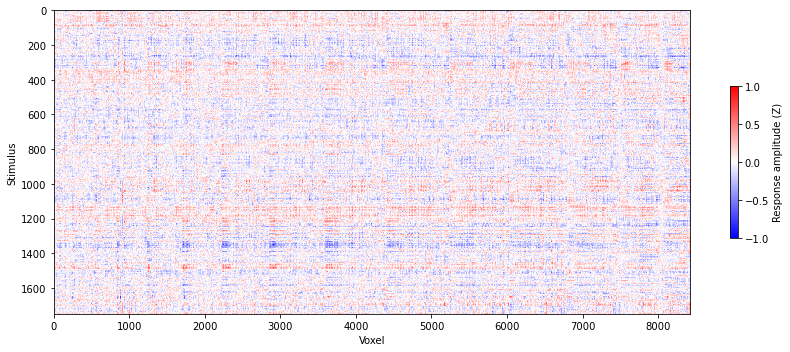

In [33]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel="Stimulus")
heatmap = ax.imshow(dat["responses"],
                    aspect="auto", vmin=-1, vmax=1, cmap="bwr")
fig.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
fig.tight_layout()
fig.show()